In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def get_action(s, w):
    if s.dot(w) > 0:
        return 1
    else:
        return 0

In [7]:
def play_one_episode(env, params, display):
    obs = env.reset()
    done = False
    t = 0
    
    if display:
        env.render()
    
    while not done and t < 2000:
        t += 1
        action = get_action(obs, params)
        obs, reward, done, _ = env.step(action)
        if done:
            break
            
    return t

In [8]:
def play_multiple_episodes(env, T, params):
    episode_lengths = np.empty(T)
    
    for t in range(T):
        episode_lengths[t] = play_one_episode(env, params, False)
        
    avg_length = episode_lengths.mean()
    
    print('Average length: ', avg_length)
    return avg_length

In [9]:
def random_search(env):
    episode_lengths = []
    best = 0
    params = None
    
    for t in range(100):
        new_params = np.random.random(4)*2-1
        avg_length = play_multiple_episodes(env, 100, new_params)
        episode_lengths.append(avg_length)
        
        if avg_length > best:
            best = avg_length
            params = new_params
    
    return episode_lengths, params

Average length:  9.6
Average length:  9.53
Average length:  36.79
Average length:  9.36
Average length:  43.57
Average length:  144.47
Average length:  28.36
Average length:  9.34
Average length:  114.06
Average length:  110.55
Average length:  200.0
Average length:  9.31
Average length:  88.37
Average length:  92.35
Average length:  8.73
Average length:  9.77
Average length:  37.16
Average length:  104.57
Average length:  9.03
Average length:  9.4
Average length:  9.33
Average length:  89.32
Average length:  189.18
Average length:  9.65
Average length:  8.94
Average length:  9.43
Average length:  63.03
Average length:  25.97
Average length:  43.9
Average length:  9.39
Average length:  121.57
Average length:  9.25
Average length:  9.6
Average length:  8.97
Average length:  9.27
Average length:  27.31
Average length:  9.39
Average length:  9.54
Average length:  200.0
Average length:  199.8
Average length:  9.52
Average length:  200.0
Average length:  9.28
Average length:  155.58
Average

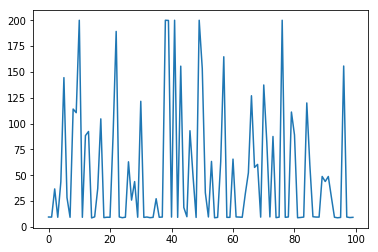

Episodes with Final Parameters:


200

In [10]:
env = gym.make('CartPole-v0')
episode_lengths, params = random_search(env)
plt.plot(episode_lengths)
plt.show()

print('Episodes with Final Parameters:')
play_one_episode(env, params, True)